In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from helper import (plot_exponential_data, 
                    plot_square_normal_data)

import warnings
warnings.simplefilter("ignore")

In [2]:
from helper import boston_dataframe
boston_data = boston_dataframe()

In this demonstration, you will import the Boston data set to train a regression model that predicts the median value of a house. 

In [3]:
boston_data.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [4]:
boston_data.shape

(506, 14)

### Determining Normality

Making our target variable normally distributed often will lead to better results

If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values.

How can we tell if our target is normally distributed? There are two ways:

Visually
Using a statistical test

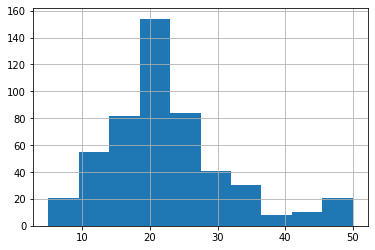

In [5]:
boston_data.MEDV.hist()
plt.show()

MEDV here  right skewed because tail is longing right side although

In [6]:
from scipy.stats.mstats import normaltest ## D'Agostino K^2 Test

Without getting into Bayesian vs. frequentist debates, for the purposes of this lesson, the following will suffice:

* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
    * This test outputs a "p-value". The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.

In [7]:
normaltest(boston_data.MEDV.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

p-value _extremely_ low. Our y variable we've been dealing with this whole time was not normally distributed!

Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable. Let's try some common transformations to try and get y to be normally distributed: 

* Log
* Square root
* Box cox

### Testing log

The log transform can transform data that is significantly skewed right to be more normally distributed:

In [8]:
log_medv = np.log(boston_data.MEDV)

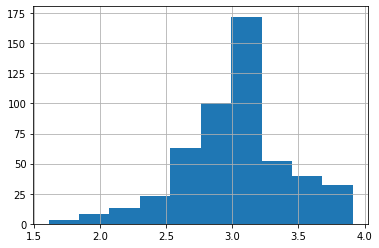

In [9]:
log_medv.hist();

now again, it's skewed left; so not normal 

In [10]:
normaltest(log_medv)

NormaltestResult(statistic=17.21801696640698, pvalue=0.00018245472768345196)

So another square root transformation 

In [11]:
sqt_medv = np.sqrt(boston_data.MEDV)

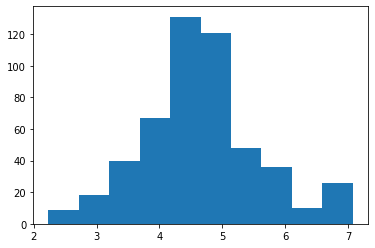

In [12]:
plt.hist(sqt_medv);

In [13]:
normaltest(sqt_medv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

look like normally but not normal reject H0 hypothesis

## BOX-COX

The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.

In [14]:
from scipy.stats import boxcox

In [15]:
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

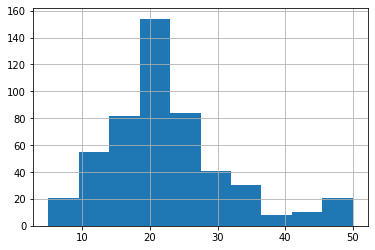

In [16]:
boston_data.MEDV.hist();

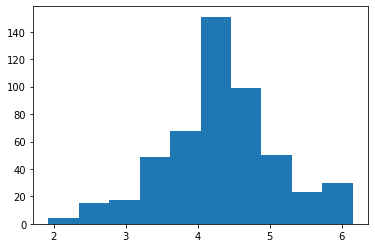

In [17]:
plt.hist(boxcox_medv);

In [18]:
normaltest(boxcox_medv)

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

now we target variable has a normal distribution. because p > 0.05 H0 not reject

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)

In [20]:
lr = LinearRegression()

In [22]:
boston_data = boston_dataframe()

**Create X and y**

In [25]:
y_col = "MEDV" #Target depended variable
X = boston_data.drop(y_col,axis=1)
Y = boston_data[y_col]

**Create Polynomial Features**

In [27]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

**Train test split**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, Y, test_size=.3, random_state=21412)

**Fit `StandardScaler` on `X_train` as before**

In [30]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [31]:
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

In [32]:
y_train_bc.shape

(354,)

In [33]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

#### Inverse transform
Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:

In [35]:
from scipy.special import inv_boxcox

In [36]:
# code from above
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [37]:
inv_boxcox(boxcox_medv, lam)[:10]

In [38]:
boston_data.MEDV.values[:10]

In [39]:
y_pred_trans = inv_boxcox(y_pred_bc,lam2)
r2_score(y_pred_trans, y_test)

0.7341688926919009

In [40]:

lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred,y_test)

0.756357857172093